In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./train.csv")
data['month'] = data['month'].map({'feb': 1, 'jan': 0, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11})
data['day'] = data['day'].map({'mon': 1, 'sun': 0, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
X        450 non-null int64
Y        450 non-null int64
month    450 non-null int64
day      450 non-null int64
FFMC     450 non-null float64
DMC      450 non-null float64
DC       450 non-null float64
ISI      450 non-null float64
temp     450 non-null float64
RH       450 non-null int64
wind     450 non-null float64
rain     450 non-null float64
area     450 non-null float64
dtypes: float64(8), int64(5)
memory usage: 45.8 KB


In [3]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,4.637778,4.306667,6.406667,2.975556,90.711556,112.545333,548.043556,9.131111,19.018889,44.580000,4.053778,0.024889,10.145489
std,2.337816,1.233966,2.286096,2.127731,5.494715,66.095553,249.387800,4.646632,5.860120,16.254081,1.750621,0.317146,43.300743
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,3.000000,4.000000,6.000000,1.000000,90.200000,68.875000,438.500000,6.500000,15.700000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,7.000000,3.000000,91.600000,108.150000,658.200000,8.400000,19.400000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,8.000000,5.000000,92.900000,142.400000,715.100000,10.950000,22.875000,54.000000,4.900000,0.000000,6.345000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,746.280000


In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,8,6,7,0,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
4,8,6,7,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [5]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,4.637778,4.306667,6.406667,2.975556,90.711556,112.545333,548.043556,9.131111,19.018889,44.580000,4.053778,0.024889,10.145489
std,2.337816,1.233966,2.286096,2.127731,5.494715,66.095553,249.387800,4.646632,5.860120,16.254081,1.750621,0.317146,43.300743
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,3.000000,4.000000,6.000000,1.000000,90.200000,68.875000,438.500000,6.500000,15.700000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,7.000000,3.000000,91.600000,108.150000,658.200000,8.400000,19.400000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,8.000000,5.000000,92.900000,142.400000,715.100000,10.950000,22.875000,54.000000,4.900000,0.000000,6.345000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,746.280000


In [6]:
data.shape

(450, 13)

In [7]:
data.corr(method='pearson')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.544278,-0.049887,0.018812,0.000431,-0.026801,-0.068320,0.030563,-0.048140,0.088710,0.034157,0.070462,0.094968
Y,0.544278,1.000000,-0.046676,0.005406,-0.040171,0.023343,-0.092877,-0.011456,-0.010443,0.051963,-0.011054,0.035087,0.063797
month,-0.049887,-0.046676,1.000000,-0.021761,0.303698,0.483469,0.885491,0.199789,0.393197,-0.076728,-0.101139,0.016727,0.038991
day,0.018812,0.005406,-0.021761,1.000000,0.096817,0.033989,0.018337,0.028934,0.022007,-0.072681,-0.029243,-0.026160,-0.008659
FFMC,0.000431,-0.040171,0.303698,0.096817,1.000000,0.369347,0.302560,0.517480,0.420209,-0.303034,-0.017988,0.060133,0.035850
DMC,-0.026801,0.023343,0.483469,0.033989,0.369347,1.000000,0.680150,0.270347,0.451701,0.070655,-0.102659,0.075731,0.097792
DC,-0.068320,-0.092877,0.885491,0.018337,0.302560,0.680150,1.000000,0.200645,0.485209,-0.032028,-0.209717,0.038222,0.036280
ISI,0.030563,-0.011456,0.199789,0.028934,0.517480,0.270347,0.200645,1.000000,0.379986,-0.148859,0.117073,0.069357,0.021936
temp,-0.048140,-0.010443,0.393197,0.022007,0.420209,0.451701,0.485209,0.379986,1.000000,-0.550889,-0.234415,0.072103,0.095625
RH,0.088710,0.051963,-0.076728,-0.072681,-0.303034,0.070655,-0.032028,-0.148859,-0.550889,1.000000,0.103855,0.105983,-0.055384


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b167e5ad0>,
      dtype=object)

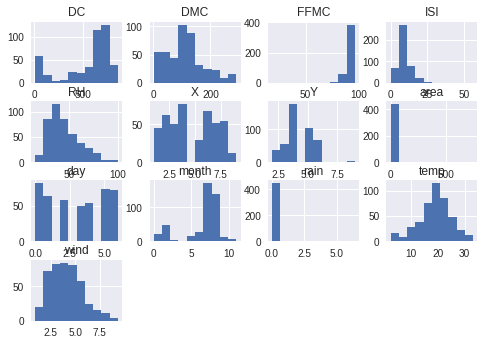

In [8]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b138b1790>,
      dtype=object)

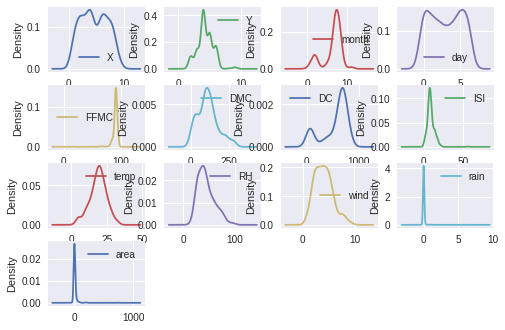

In [10]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False)

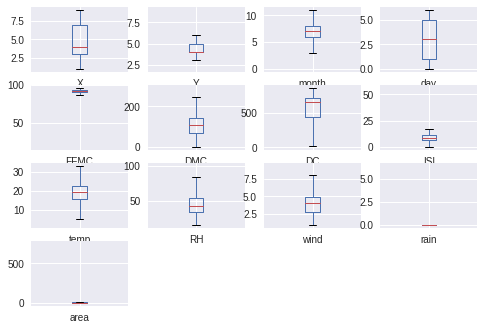

In [11]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

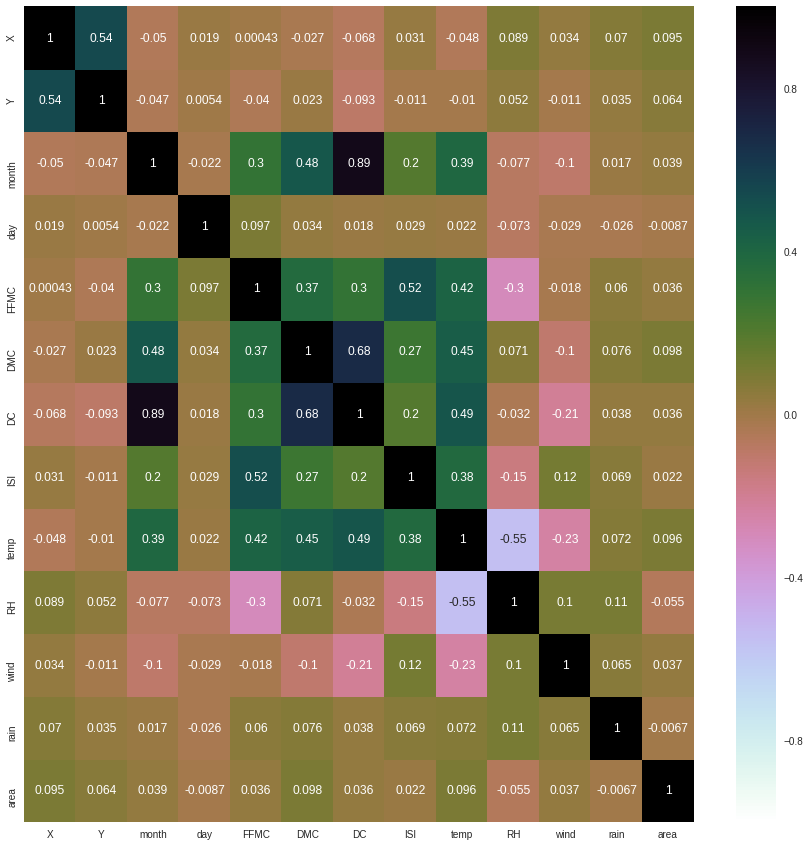

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)
plt.figure(figsize=(15,15)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


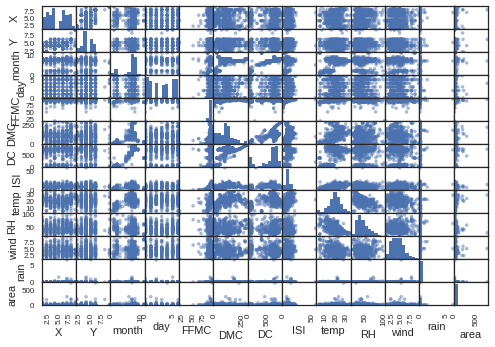

In [17]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [25]:
used_features = [
	"X",
    "Y",
    "month",
    "day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"
	]
features = data[used_features]
target = data["area"]

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

reg = ExtraTreesRegressor(n_estimators=100)
rfe = RFE(reg)
fit = rfe.fit(feature_train,target_train)

print fit.n_features_
print fit.support_
print fit.ranking_

6
[False  True False  True False  True False False  True  True  True False]
[5 1 6 1 3 1 2 4 1 1 1 7]


In [46]:
used_features = ["DMC","temp","RH","wind"]
features = data[used_features]
target = data["area"]

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

reg = ExtraTreesRegressor(n_estimators=100)
reg.fit(feature_train,target_train)
reg.score(feature_test,target_test)


-0.5432301002220372

In [0]:
test = pd.read_csv("./test.csv")
test['month'] = test['month'].map({'feb': 1, 'jan': 0, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11})
test['day'] = test['day'].map({'mon': 1, 'sun': 0, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6})

test_fea = test[used_features]
aid = test["Id"]


In [0]:
res = reg.predict(test_fea)

df = pd.DataFrame(data={"Id": aid, "Zarea": res})
df.to_csv("./output.csv", sep=',',index=False)